# 🎮 Video Game Sales Analysis - Global Trends & Insights

This project explores a dataset of historical video game sales, covering games, platforms, genres, publishers, and regional sales figures. The goal is to uncover trends in global sales performance, genre popularity, and publisher dominance.

## 📊 Dataset

The dataset includes detailed sales data for thousands of video games, with the following variables:

- Name of the game
- Platform (e.g. PS2, Xbox, Wii, etc.)
- Year of release
- Genre
- Publisher
- Global sales and regional sales (North America, Japan, Europe, Others)

🗂️ Source: [VG Sales Dataset](https://gist.githubusercontent.com/zhonglism/f146a9423e2c975de8d03c26451f841e/raw/vgsales.csv)

## 🔎 Key Questions Explored

- What are the top 5 best-selling video games worldwide?
- Which platforms generate the highest average revenue per game?
- How have video game sales changed over the years?
- What is the distribution of global sales across different genres?
- How significant is the US market compared to others?
- Which publishers have the highest total global sales?
- How do regional sales in Japan correlate with other markets?
- How has genre popularity evolved over time?
- What is the global revenue share of the top 5 publishers?
- Which platforms dominate in global sales volume?

## 👨‍🏫 Project Background
> **Note:** This project was completed as part of my Data Analyst certification. It served to apply EDA techniques, uncover business-related insights, and practice presenting findings with data storytelling.

### Preparation

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Load the video games sales dataset
url = 'https://gist.githubusercontent.com/zhonglism/f146a9423e2c975de8d03c26451f841e/raw/vgsales.csv'
video_games_df = pd.read_csv(url)

In [12]:
# Select relevant columns
selected_columns = ['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
video_games_df = video_games_df[selected_columns]

### 📊 EDA

Q1: What are the top 5 best-selling video games worldwide?

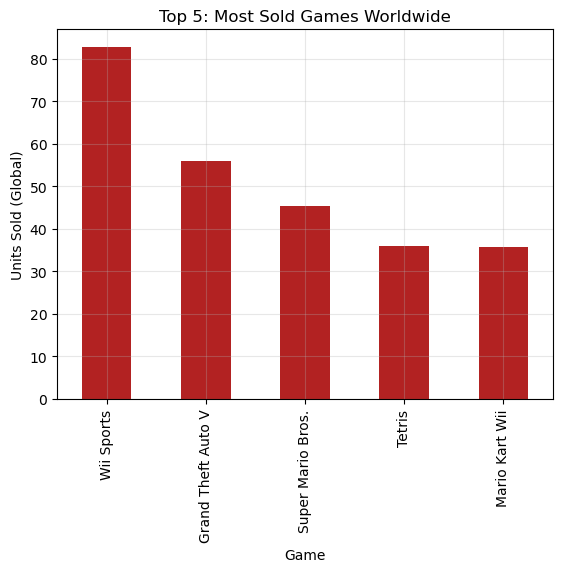

In [17]:
#Global top 5 sold games
global_top5 = video_games_df['Global_Sales'].groupby(video_games_df['Name']).sum().sort_values(ascending=False).head(5)
global_top5.plot(kind='bar', color='firebrick')
plt.title('Top 5: Most Sold Games Worldwide')
plt.xlabel('Game')
plt.ylabel('Units Sold (Global)')
plt.grid(True, alpha=0.3)
plt.show()

Q2: Which platforms generate the highest average revenue per game?
Aufgabe 2: Welche Plattform hat den höchsten durchschnittlichen weltweiten Umsatz?

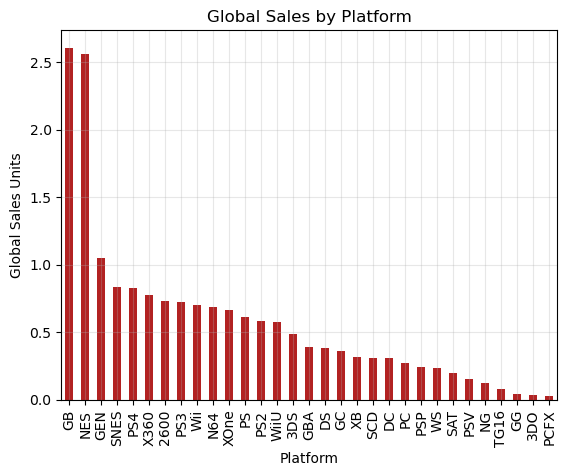

In [18]:
#Platform with highest average sales volume
global_sales_by_platform = video_games_df['Global_Sales'].groupby(video_games_df['Platform']).mean().sort_values(ascending=False)
global_sales_by_platform.plot(kind='bar', color='firebrick')
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

GB is the platform with the highest average revenue per game, with +2.5, followed by Nintendo Entertainment Systems. 
This is a very important intel for game publishers, as in where to publish on and where to send marketing initiatives. 

Q3: How have video game sales changed over the years?

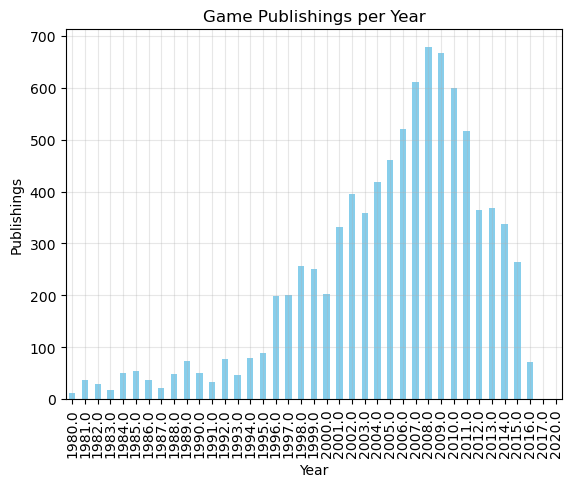

In [26]:
#Global Sales per Year
global_sales_per_year = video_games_df['Global_Sales'].groupby(video_games_df['Year']).sum()
global_sales_per_year.plot(kind='bar', color='skyblue')
plt.title('Game Publishings per Year')
plt.xlabel('Year')
plt.ylabel('Publishings')
plt.grid(True, alpha=0.3)
plt.show()

The above plot shows a steady and in parts steap growth in annual game publishings up until 2009. 
After that, we see a strong decline in yearly publishings, with the data from 2013 on a level of 2001.

Future analysis could dive into the following years and see if the market has re-established itself. 
What in specific was behind the drop in publishings? 
Did games not sell as expected?
Did publishers leave the market?
Or did the publishers' focus on fewer, top-tier publishings cause a shift within the market strategy?

Q4: What is the distribution of global sales across different genres?

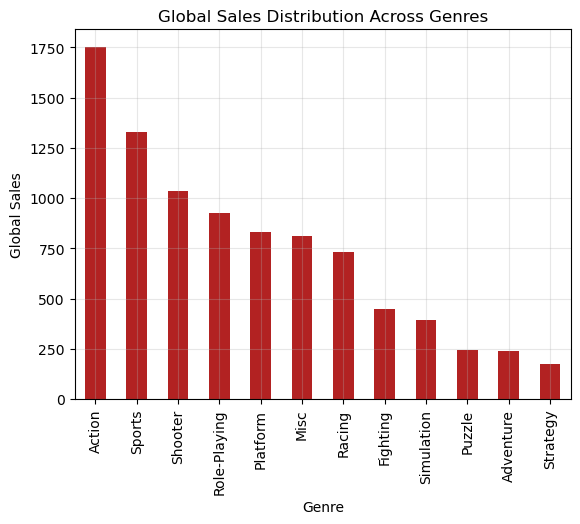

In [34]:
#Global Sales Distribution across genres
global_sales_by_genre = video_games_df['Global_Sales'].groupby(video_games_df['Genre']).sum().sort_values(ascending=False)
global_sales_by_genre.plot(kind='bar', color='firebrick')
plt.title('Global Sales Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.grid(True, alpha=0.3)
plt.show()

The Action genre is by far the most popular worldwide, followed by Sports and Shooter.
Publishers want to make sure to cater to a mix of both popular, in demand genres, but also lean toward a more niche-area as adventure, racing, strategy, if they recognize a growth potantial in certain markets. 

Q6: How significant is the US market compared to others?

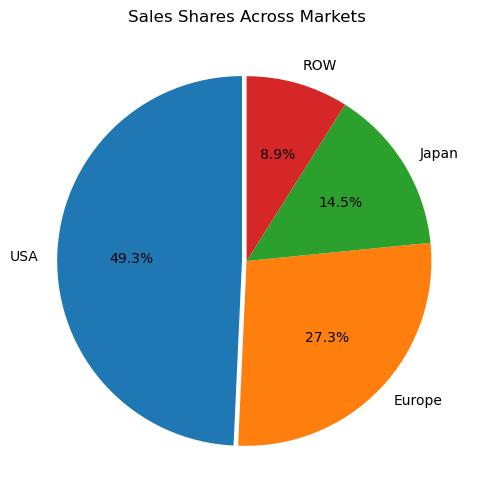

In [107]:
#Sales Share Across Regions
na_sum = video_games_df['NA_Sales'].sum()
eu_sum = video_games_df['EU_Sales'].sum()
jp_sum = video_games_df['JP_Sales'].sum()
row_sum = video_games_df['Other_Sales'].sum()

#Converting to list
labels = ['USA', 'Europe', 'Japan', 'ROW']
values = [na_sum, eu_sum, jp_sum, row_sum]

#Pie Chart
plt.figure(figsize=(6,6))
explode = [0.025,0,0,0]
plt.pie(values, labels=labels, autopct='%1.1f%%', explode=explode, startangle=90)
plt.title('Sales Shares Across Markets')
plt.show()

The chart shows the dominance of the US market with almost 50% of sales share. 
In other words: The US market alone sold as many games as the other markets combined.

Q6: Which publishers have the highest total global sales?

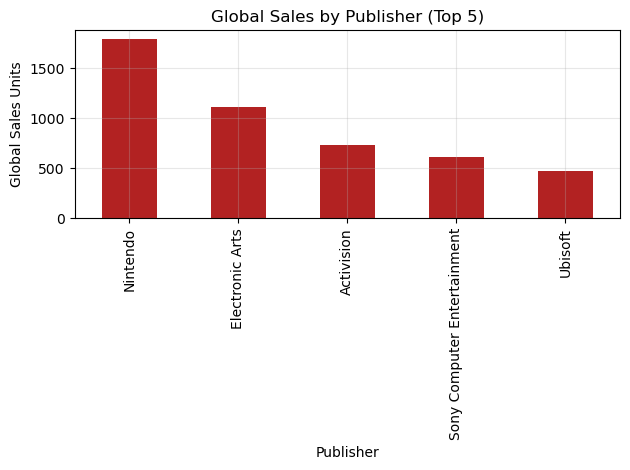

In [48]:
sales_by_publisher = video_games_df['Global_Sales'].groupby(video_games_df['Publisher']).sum().sort_values(ascending=False).head(5)

sales_by_publisher.plot(kind='bar', color='firebrick')
plt.title('Global Sales by Publisher (Top 5)')
plt.xlabel('Publisher')
plt.ylabel('Global Sales Units')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Nintendo is the strongest selling publishers, followed by EA and Activision, Sony and Ubisoft. 

Q7: How does global sales distribute across platforms?

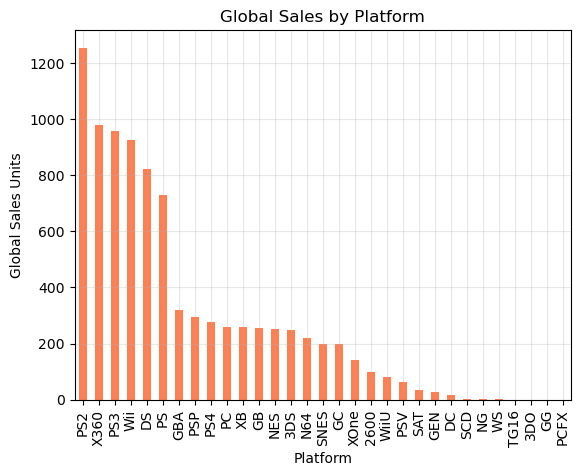

In [123]:
#Sales by Platform
sales_by_platform = video_games_df['Global_Sales'].groupby(video_games_df['Platform']).sum().sort_values(ascending=False)
sales_by_platform.plot(kind='bar', color='coral')
plt.title('Global Sales by Platform')
plt.xlabel('Platform')
plt.ylabel('Global Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

On a global scale, PS2 games were sold the most with ober 1,2 million. 
Xbox360, PS3 and Wii follow pretty even, ranking 2-4.

One needs to consider the amount of years a platform has been on the market, to quantify these findings. 

Q8: What are the average sales by genre in Europe?

In [133]:
#Avg sales by genre in Europe
avg_sales_eu = video_games_df['EU_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False).to_frame()
avg_sales_eu                                                  

,EU_Sales
Genre,
Shooter,0.239137
Platform,0.227573
Racing,0.190865
Sports,0.160635
Action,0.158323
Simulation,0.130773
Role-Playing,0.126384
Misc,0.124198
Fighting,0.119481


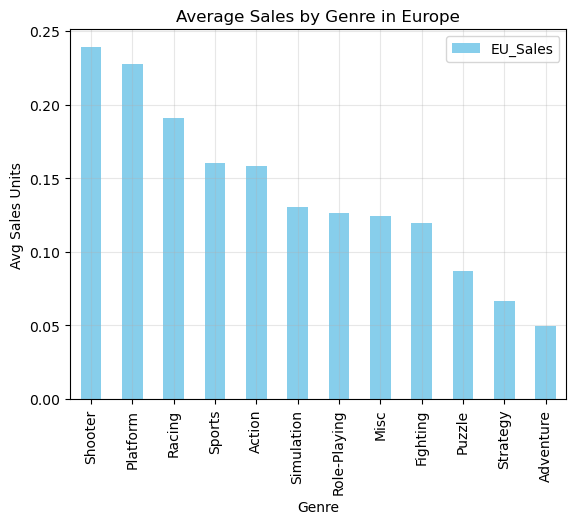

In [135]:
avg_sales_eu.plot(kind='bar', color='skyblue')
plt.title('Average Sales by Genre in Europe')
plt.xlabel('Genre')
plt.ylabel('Avg Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

In Europe, Shooter games are the most popular ones with 239,137 units sold on average. 
Followed by Platform (almost similar), Racing, Sports, and Action. 

For publishers this is a crucial intel, as it differs from other territories. Publishers want to make sure to take this preference into account when marketing their products. 

Q9: How do regional sales in Japan correlate with other markets?

In [65]:
correlation_jp_sales_other_regions = video_games_df['JP_Sales'].corr(video_games_df['Other_Sales'])
print(f'Correlation between Sales in Japan and Other Regions: {correlation_jp_sales_other_regions}')

Correlation between Sales in Japan and Other Regions: 0.2901862496015254


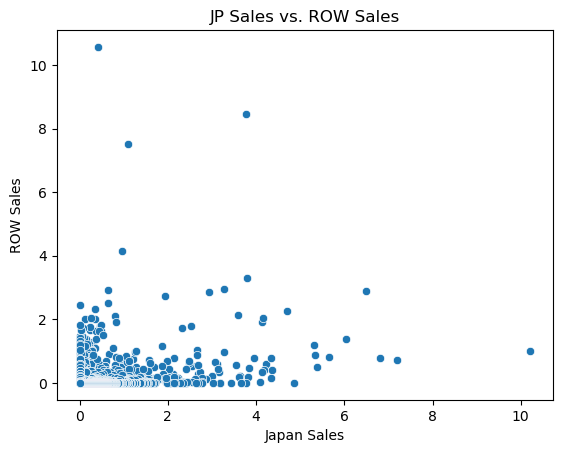

In [147]:
#Correlation: JP vs ROW
sns.scatterplot(x=video_games_df['JP_Sales'], y=video_games_df['Other_Sales'])
plt.title('JP Sales vs. ROW Sales')
plt.xlabel('Japan Sales')
plt.ylabel('ROW Sales')
plt.show()

What is interesting here is the presence of strong outliers. While the overall correlation between JP and ROW sales is pretty low but positive, there games that work extremely well in JP but not in ROW and vice versa. 
It would be interesting to compare that cultural uniqueness for other markets as well.

Q10: How has genre popularity evolved over time?

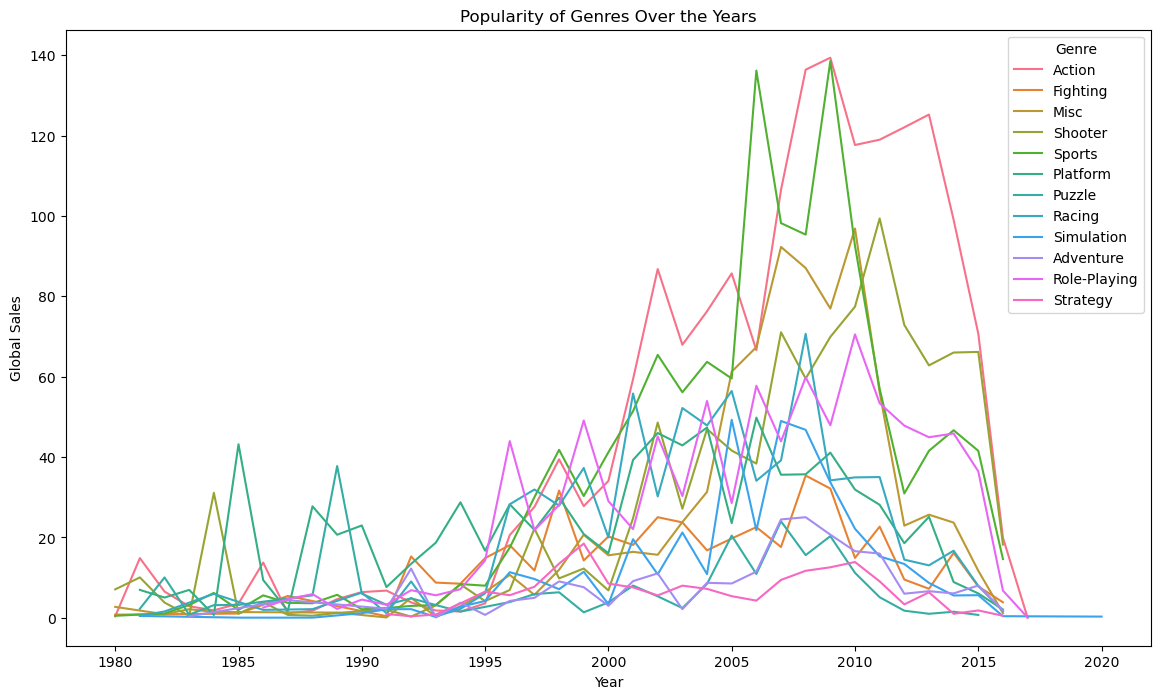

In [70]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Global_Sales', hue='Genre', data=video_games_df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index(), palette='husl')
plt.title('Popularity of Genres Over the Years')
plt.xlabel('Year')
plt.ylabel('Global Sales')
plt.show()

Understanding the genre popularity plays a crucial role in developing games and key markets. 
The above lineplot delivers an interesting insight: Sport games were the most popular ones in 2006, before Action games took over the lead again. 
This could be due to the release of a highlight sports game, such as FIFA 2006 World Cup - but just a guess from the outside. 

Publishers want to make sure to consider genre trends ahead of time and anticipate through customer and youth culture analysis, which genres they should cater to. 

Q11: What is the average sales by genre in North America?

In [214]:
#Avg sales by genre in NA
avg_sales_genre_na = video_games_df['NA_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False).round(2)
avg_sales_genre_na.to_frame().rename(columns={'NA_Sales':'Average Sales USA'})                                   

,Average Sales USA
Genre,
Platform,0.50
Shooter,0.44
Sports,0.29
Racing,0.29
Action,0.26
Fighting,0.26
Misc,0.24
Role-Playing,0.22
Puzzle,0.21


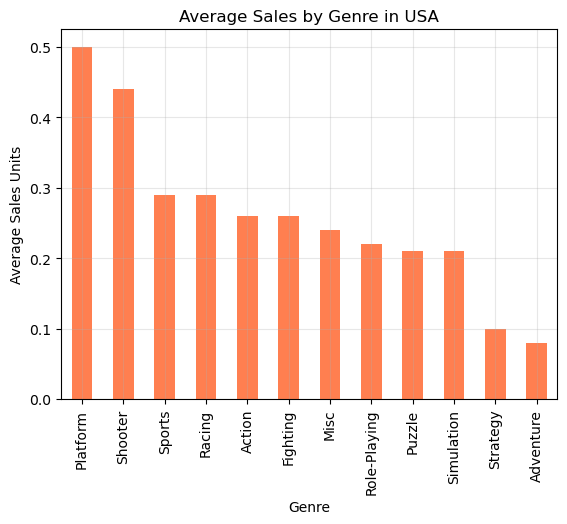

In [216]:
avg_sales_genre_na.plot(kind='bar', color='coral')
plt.title('Average Sales by Genre in USA')
plt.xlabel('Genre')
plt.ylabel('Average Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

Just like any other market, the US has its uniqueness when it comes to the most popular gaming genres. 
Platform games reach the highest sales on average, followed by Shooter, Sports, and Racing. 
The two least selling gaming genres are Strategy and Adventure.

Q12: How do sales units in Japan distribute across platforms?

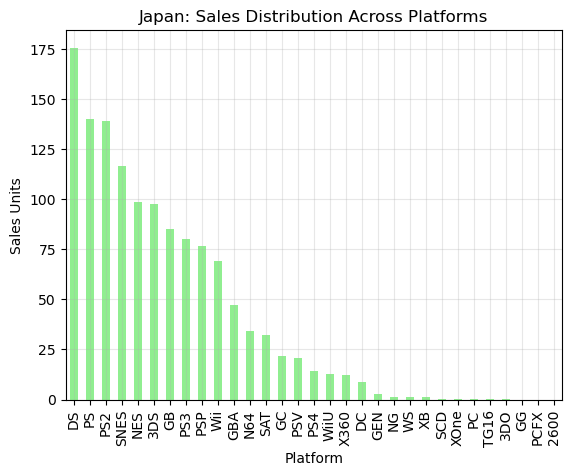

In [222]:
#Sales Distribution across platforms in Japan
platform_sales_jp = video_games_df['JP_Sales'].groupby(video_games_df['Platform']).sum().sort_values(ascending=False)
platform_sales_jp.plot(kind='bar', color='lightgreen')
plt.title('Japan: Sales Distribution Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

In Japan, the most units were sold for the DS platform. 
Followed by PS and PS2 head-on-head, and SNES.

Q13: What is the average sales per genre in Japan?

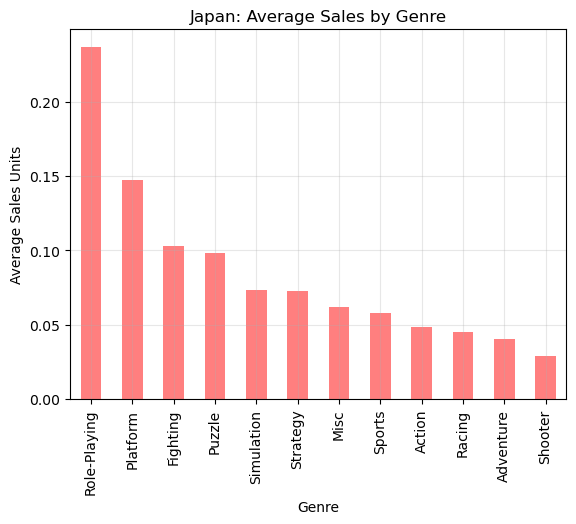

In [230]:
#Avg Sales by Genre in Japan
avg_sales_genre_jp = video_games_df['JP_Sales'].groupby(video_games_df['Genre']).mean().sort_values(ascending=False)
avg_sales_genre_jp.plot(kind='bar', color='red', alpha=0.5)
plt.title('Japan: Average Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

On average, Role-Playing games sell the most units on average. Shooter games are the least popular ones, with only 0.05 on average.
Again, this is a uniqueness of the Japanese market if we compare it to the European market, were Shooter games were the most popular ones.

Q14: How do sales units per platform distribute in Europe?

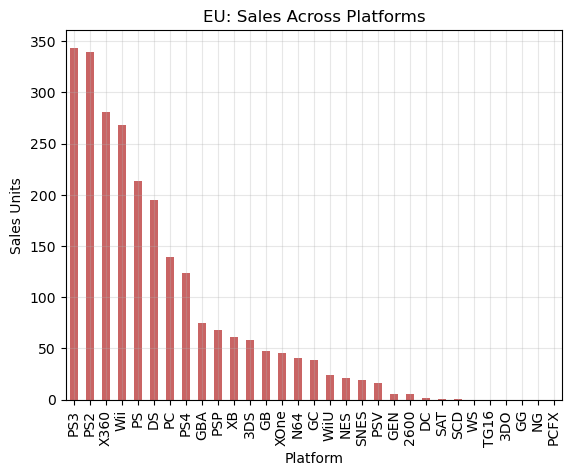

In [240]:
#Sales Distribution across platforms in Europe
sales_platform_eu = video_games_df['EU_Sales'].groupby(video_games_df['Platform']).sum().sort_values(ascending=False)
sales_platform_eu.plot(kind='bar', color='firebrick', alpha=0.7)
plt.title('EU: Sales Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Sales Units')
plt.grid(True, alpha=0.3)
plt.show()

PS3 and PS2 are particularly popular om the European market, followed by Xbobx260 and Wii.